# Introduction

Here I will explain about the different creativity tests I implemented, as well as how to use the repo to test your own models. I will include code and hopefully plot some cool results.

# Text Modality

## Divergent Association Task (DAT)
This is a creativity test where a person/LLM is asked to name 10 words that are as different from each other as possible. \
Here is the actual prompt I ask the LLMs to answer:

''' \
**Please enter 10 words that are as different from each other as possible, \
in all meanings and uses of the words. Rules: Only single words in English. \
Only nouns (e.g., things, objects, concepts). No proper nouns (e.g., no specific people or places). \
No specialized vocabulary (e.g., no technical terms). \
Think of the words on your own (e.g., do not just look at objects in your surroundings). \
Make a list of these 10 words, a single word in each entry of the list. \
Do not write anything else, but the 10 words.** \
'''

Let's explore the effect of temperature on the creative score of a model.

### Effect of temperature on DAT creativity scores

In [1]:
from embeddings import BERT_Encoder_L6, BERT_Encoder_L7, BERT_WordEmbeddings_L6, BERT_WordEmbeddings_L7, GloVe
from creative_tests import DivergentAssociationTest, HardDivergentAssociationTest
from plot_results import plot_distribution_results, plot_correlation

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Example to Run experiment:

```
test = DivergentAssociationTest(
    models=["gemini-2.0-flash"],
    configs=[{"temperature": 0.5} ,{"temperature": 1}, {"temperature": 1.5}, {"temperature": 2}],
    repeats=10,
    delay=5,
)

test.run()
```

However, in most of these examples, I've already made the API requests, so we can just calculate the embeddings and plot the results

In [2]:
test = DivergentAssociationTest(
    models=["gemini-2.0-flash"],
    configs=[
        {"temperature": 0.5},
        {"temperature": 0.625},
        {"temperature": 0.75},
        {"temperature": 0.875},
        {"temperature": 1},
        {"temperature": 1.125},
        {"temperature": 1.25}, 
        {"temperature": 1.5},
        {"temperature": 1.625},
        {"temperature": 1.75},
        {"temperature": 1.875},
        {"temperature": 2},
    ],
    repeats=20,
    delay=6,
)

# test.run()
test.calculate_embeddings("responses/DAT_0617175742_1models_12configs_10words_clean.json")

Found id 0617175742


Initializing model: 2196018it [00:17, 125049.74it/s]


['results/DAT_0617175742_1models_12configs_10words_unnormalized.json',
 'results/DAT_0617175742_1models_12configs_10words_normalized.json']

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


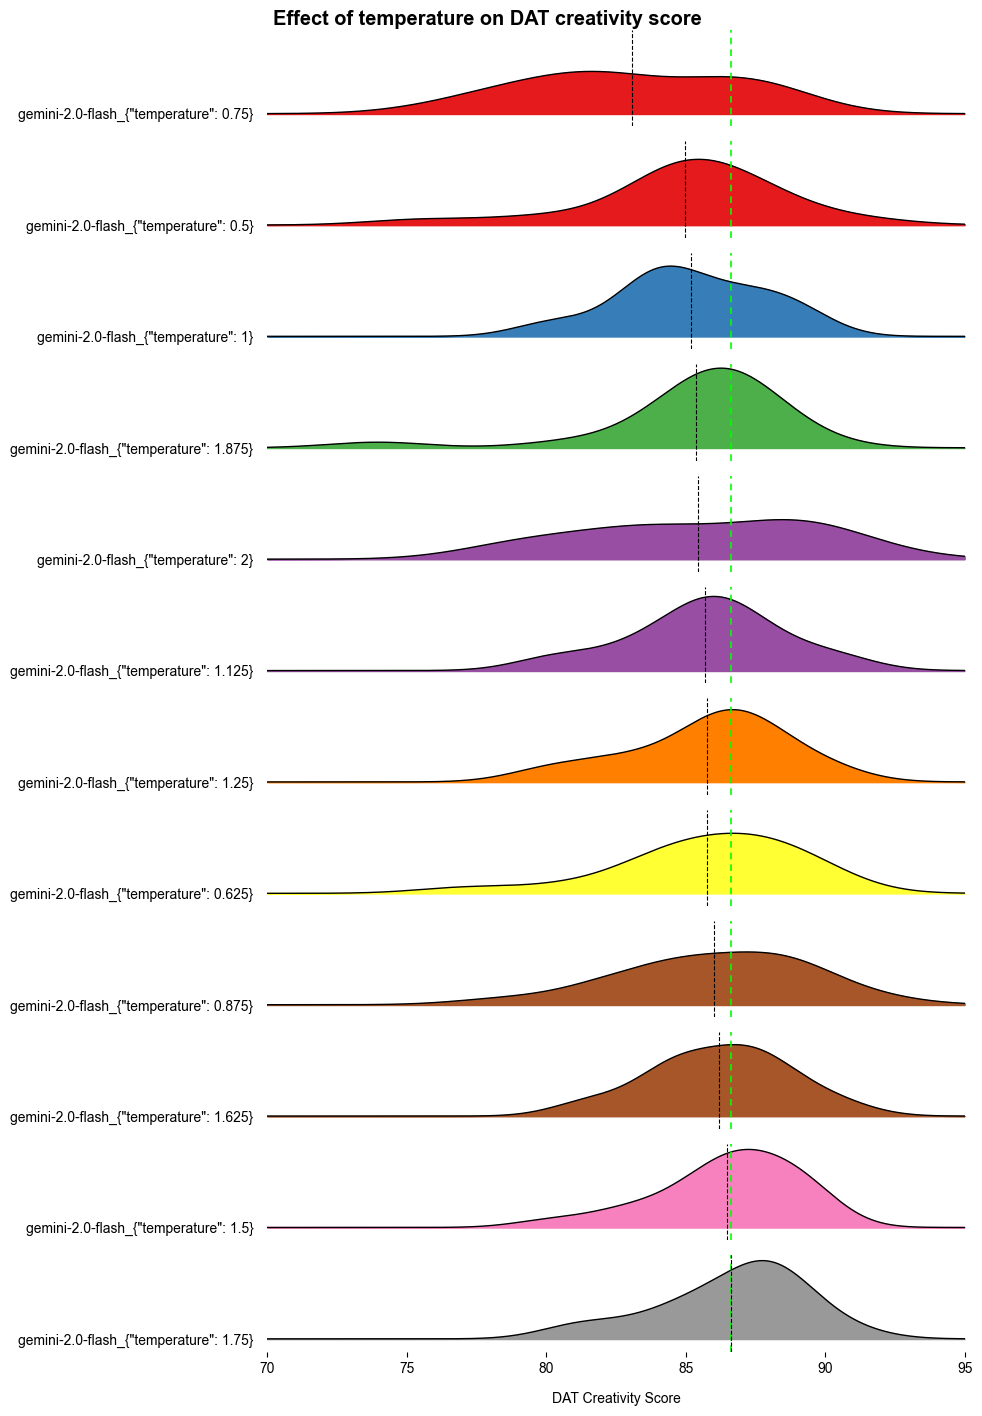

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 1.75}'): 86.63


In [3]:
plot_distribution_results('./results/DAT_0617175742_1models_12configs_10words_unnormalized.json',
                          dark_mode=False,
                          plot_title="Effect of temperature on DAT creativity score",
                          x_axis_title="DAT Creativity Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=70, 
                          x_max=95,
                          save_file=True, 
                          file_name="temperature_effect_on_creativity.png",
)

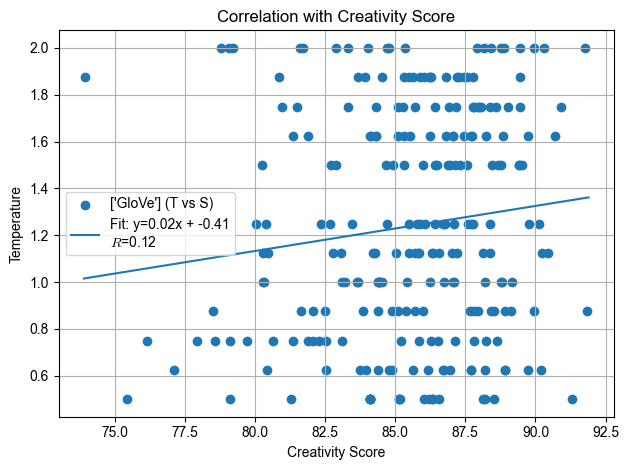

In [4]:
plot_correlation('./results/DAT_0617175742_1models_12configs_10words_unnormalized.json',
                 'temperature',
                 second_key=None,
                 embedding_model=['GloVe'],
                 plot_title="Correlation with Creativity Score",
                 x_axis_title="Creativity Score",
                 y_axis_title="Temperature",
                 save_file=False, 
                 file_name="plot.png")

As we can see, there is a weak correlation in gemini-2.0-flash. Let's try running the same experiment, but sampling from different similar prompts.

In [5]:
test = DivergentAssociationTest(
    models=["gemini-2.0-flash"],
    configs=[
        {"temperature": 0.5},
        {"temperature": 0.625},
        {"temperature": 0.75},
        {"temperature": 0.875},
        {"temperature": 1},
        {"temperature": 1.125},
        {"temperature": 1.25}, 
        {"temperature": 1.5},
        {"temperature": 1.625},
        {"temperature": 1.75},
        {"temperature": 1.875},
        {"temperature": 2},
    ],
    standard_prompt=False, # <----- Difference with previous experiment
    repeats=20,
    delay=6,
)

# test.run()
test.calculate_embeddings('responses/DAT_0617191727_1models_12configs_10words_clean.json')

Found id 0617191727


Initializing model: 2196018it [00:16, 136678.37it/s]


['results/DAT_0617191727_1models_12configs_10words_unnormalized.json',
 'results/DAT_0617191727_1models_12configs_10words_normalized.json']

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


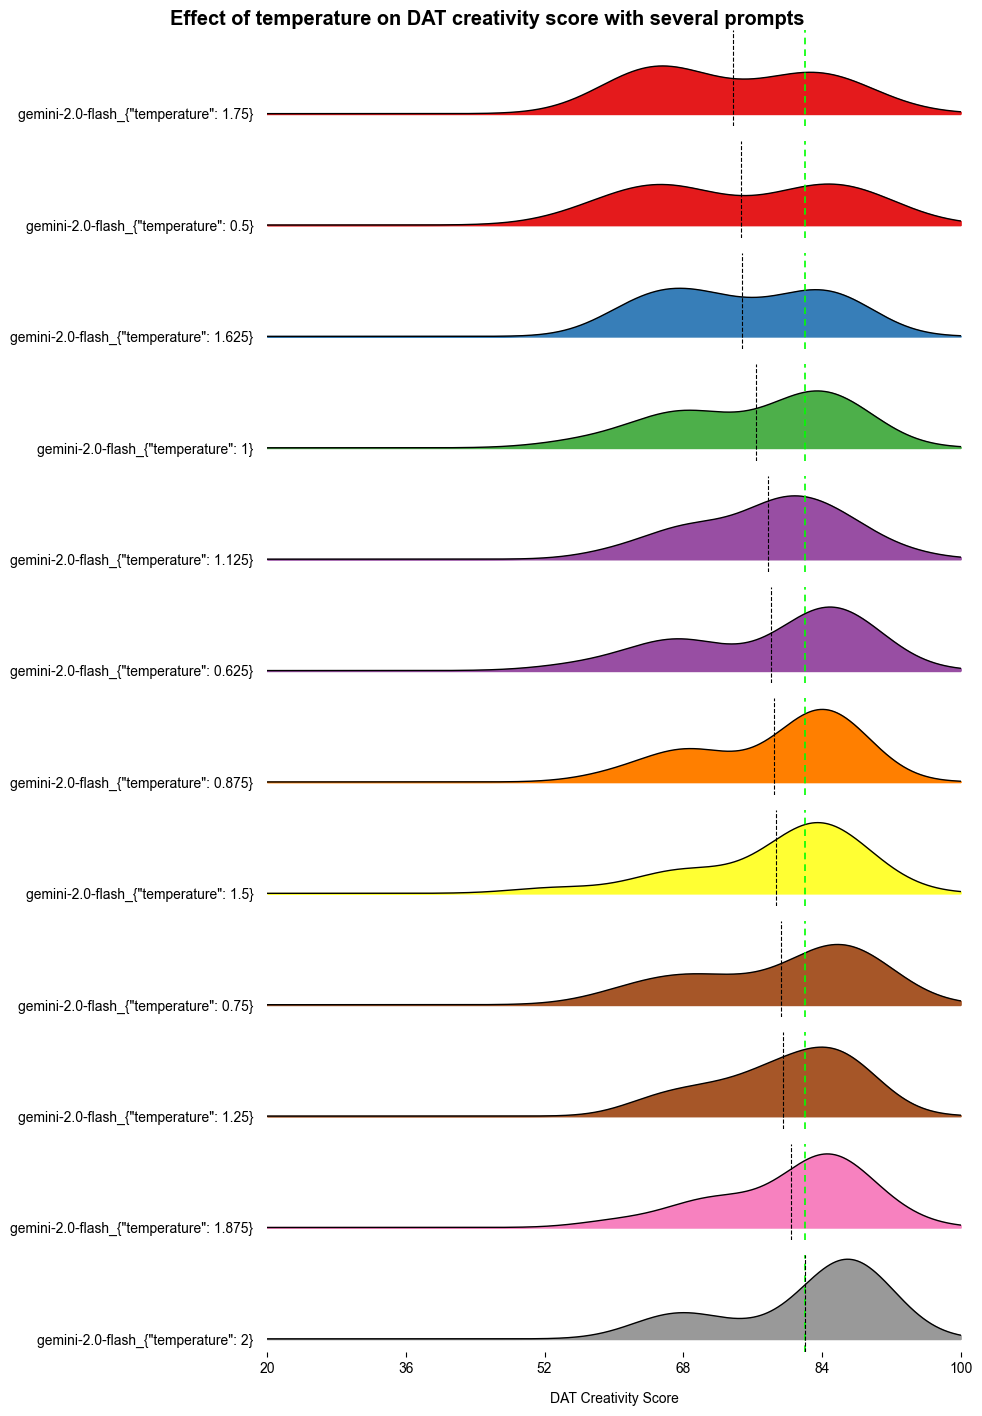

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 2}'): 82.06


In [6]:
plot_distribution_results('results/DAT_0617191727_1models_12configs_10words_unnormalized.json',
                          dark_mode=False,
                          plot_title="Effect of temperature on DAT creativity score with several prompts",
                          x_axis_title="DAT Creativity Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=20, 
                          x_max=100,
                          save_file=True, 
                          file_name="temperature_effect_on_creativity_several_prompts.png",
)

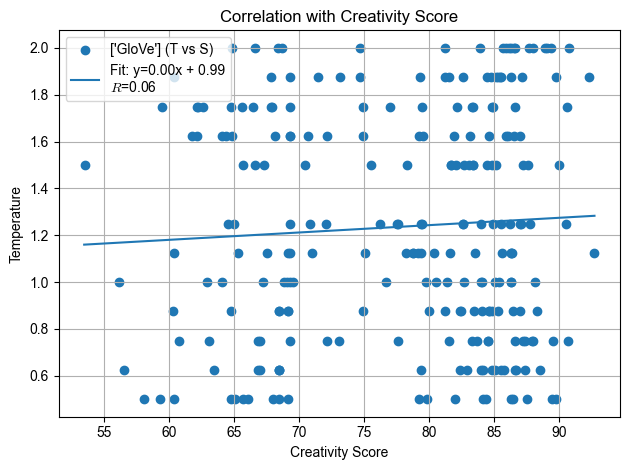

In [7]:
plot_correlation('results/DAT_0617191727_1models_12configs_10words_unnormalized.json',
                 'temperature',
                 second_key=None,
                 embedding_model=['GloVe'],
                 plot_title="Correlation with Creativity Score",
                 x_axis_title="Creativity Score",
                 y_axis_title="Temperature",
                 save_file=False, 
                 file_name="plot.png")

### Effect of thinking budget on DAT creativity scores

In [8]:
test = DivergentAssociationTest(
    models=["gemini-2.5-flash"],
    configs=[{"temperature": 0.5, "thinking_config": {"thinking_budget": 20}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 50}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 100}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 200}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 400}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 300}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 1000}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 1500}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 2000}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 3000}},
             {"temperature": 0.5, "thinking_config": {"thinking_budget": 4500}},
    ],
    repeats=10,
    delay=7,
)

prev = test.clean_llm_response("responses/DAT_0626113905_1models_11configs_10words.json")
test.calculate_embeddings(prev=prev)

Found id 0626113905


Initializing model: 2196018it [00:16, 135448.11it/s]


['results/DAT_0626113905_1models_11configs_10words_unnormalized.json',
 'results/DAT_0626113905_1models_11configs_10words_normalized.json']

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


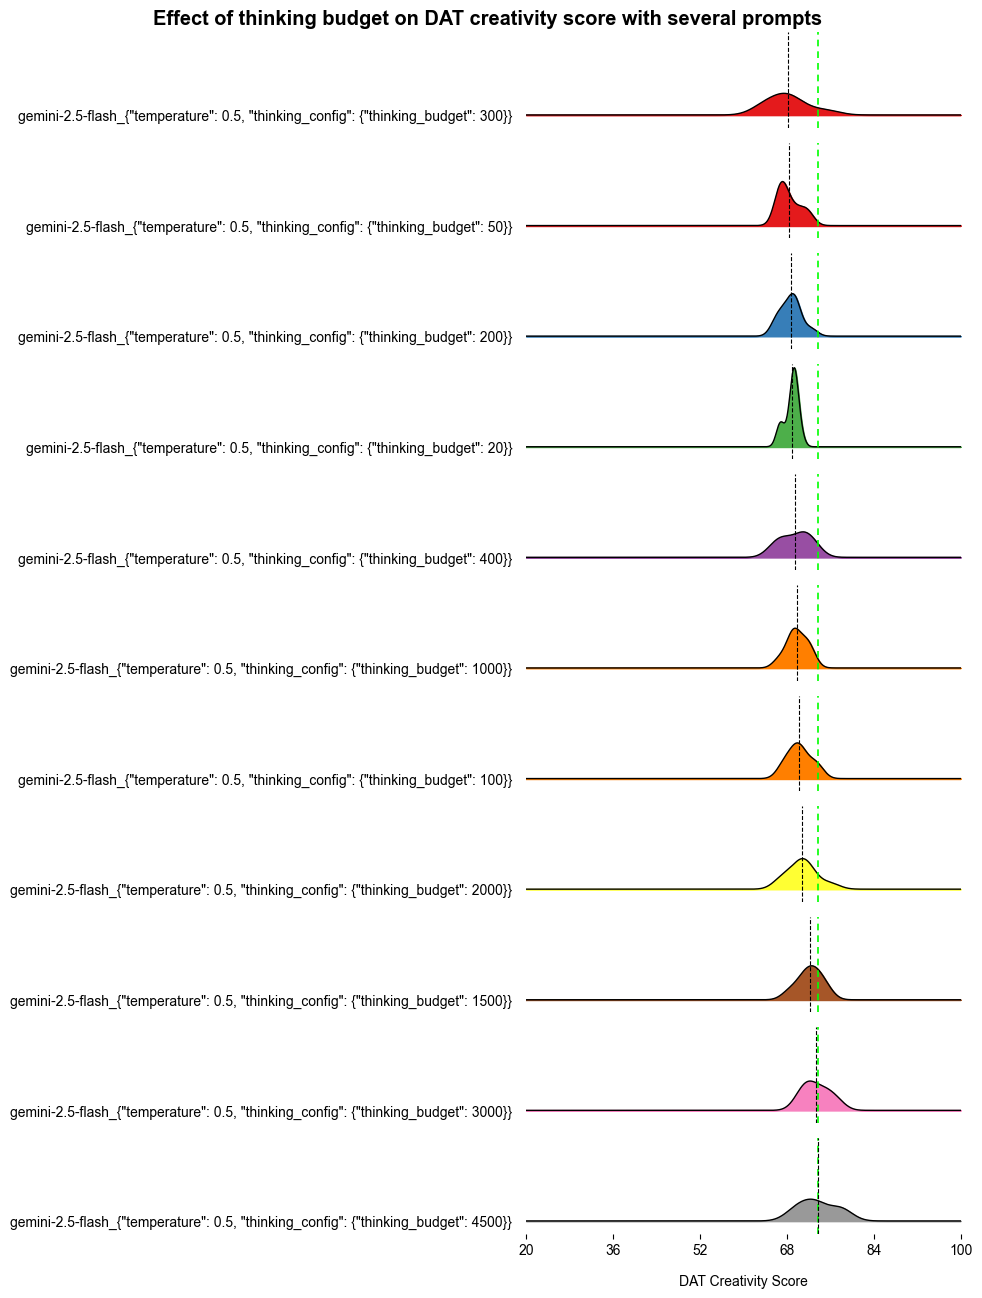

Benchmark (mean of top model 'gemini-2.5-flash_{"temperature": 0.5, "thinking_config": {"thinking_budget": 4500}}'): 73.66


In [9]:
plot_distribution_results('results/DAT_0626113905_1models_11configs_10words_unnormalized.json',
                          dark_mode=False,
                          plot_title="Effect of thinking budget on DAT creativity score with several prompts",
                          x_axis_title="DAT Creativity Score",
                          show_benchmark=True,
                          ascending=True,
                          x_min=20, 
                          x_max=100,
                          save_file=False, 
                          file_name="thinking_budget_effect_on_creativity.png",
)

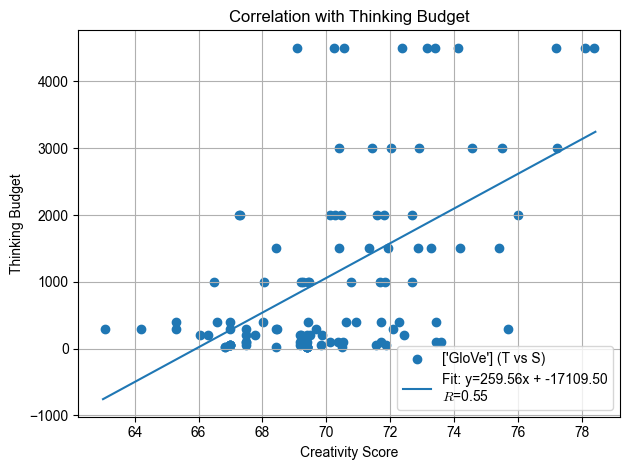

In [13]:
plot_correlation('results/DAT_0626113905_1models_11configs_10words_unnormalized.json',
                 key='thinking_config',
                 second_key="thinking_budget",
                 embedding_model=["GloVe"], # BERT_WordEmbeddings_L6
                 plot_title="Correlation with Thinking Budget",
                 x_axis_title="Creativity Score",
                 y_axis_title="Thinking Budget",
                 save_file=True, 
                 file_name="thinking_budget_effect_on_creativity_correlation.png")

### Comparisons between models at different temperatures

In [11]:
test = DivergentAssociationTest(
    models=["gemini-2.0-flash-lite", 
            "gemini-2.0-flash", 
            "gemini-2.5-flash", 
            "gemini-2.5-flash-preview-04-17", 
            "gemini-2.5-flash-lite-preview-06-17"
    ],
    configs=[
        {"temperature": 0.5},
        {"temperature": 1},
        {"temperature": 1.5},
        {"temperature": 2},
    ],
    repeats=50,
    delay=7,
)

# test.run()
test.calculate_embeddings("responses/DAT_0618120359_5models_4configs_10words_clean.json")

Found id 0618120359


Initializing model: 2196018it [00:16, 132547.01it/s]


['results/DAT_0618120359_5models_4configs_10words_unnormalized.json',
 'results/DAT_0618120359_5models_4configs_10words_normalized.json']

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


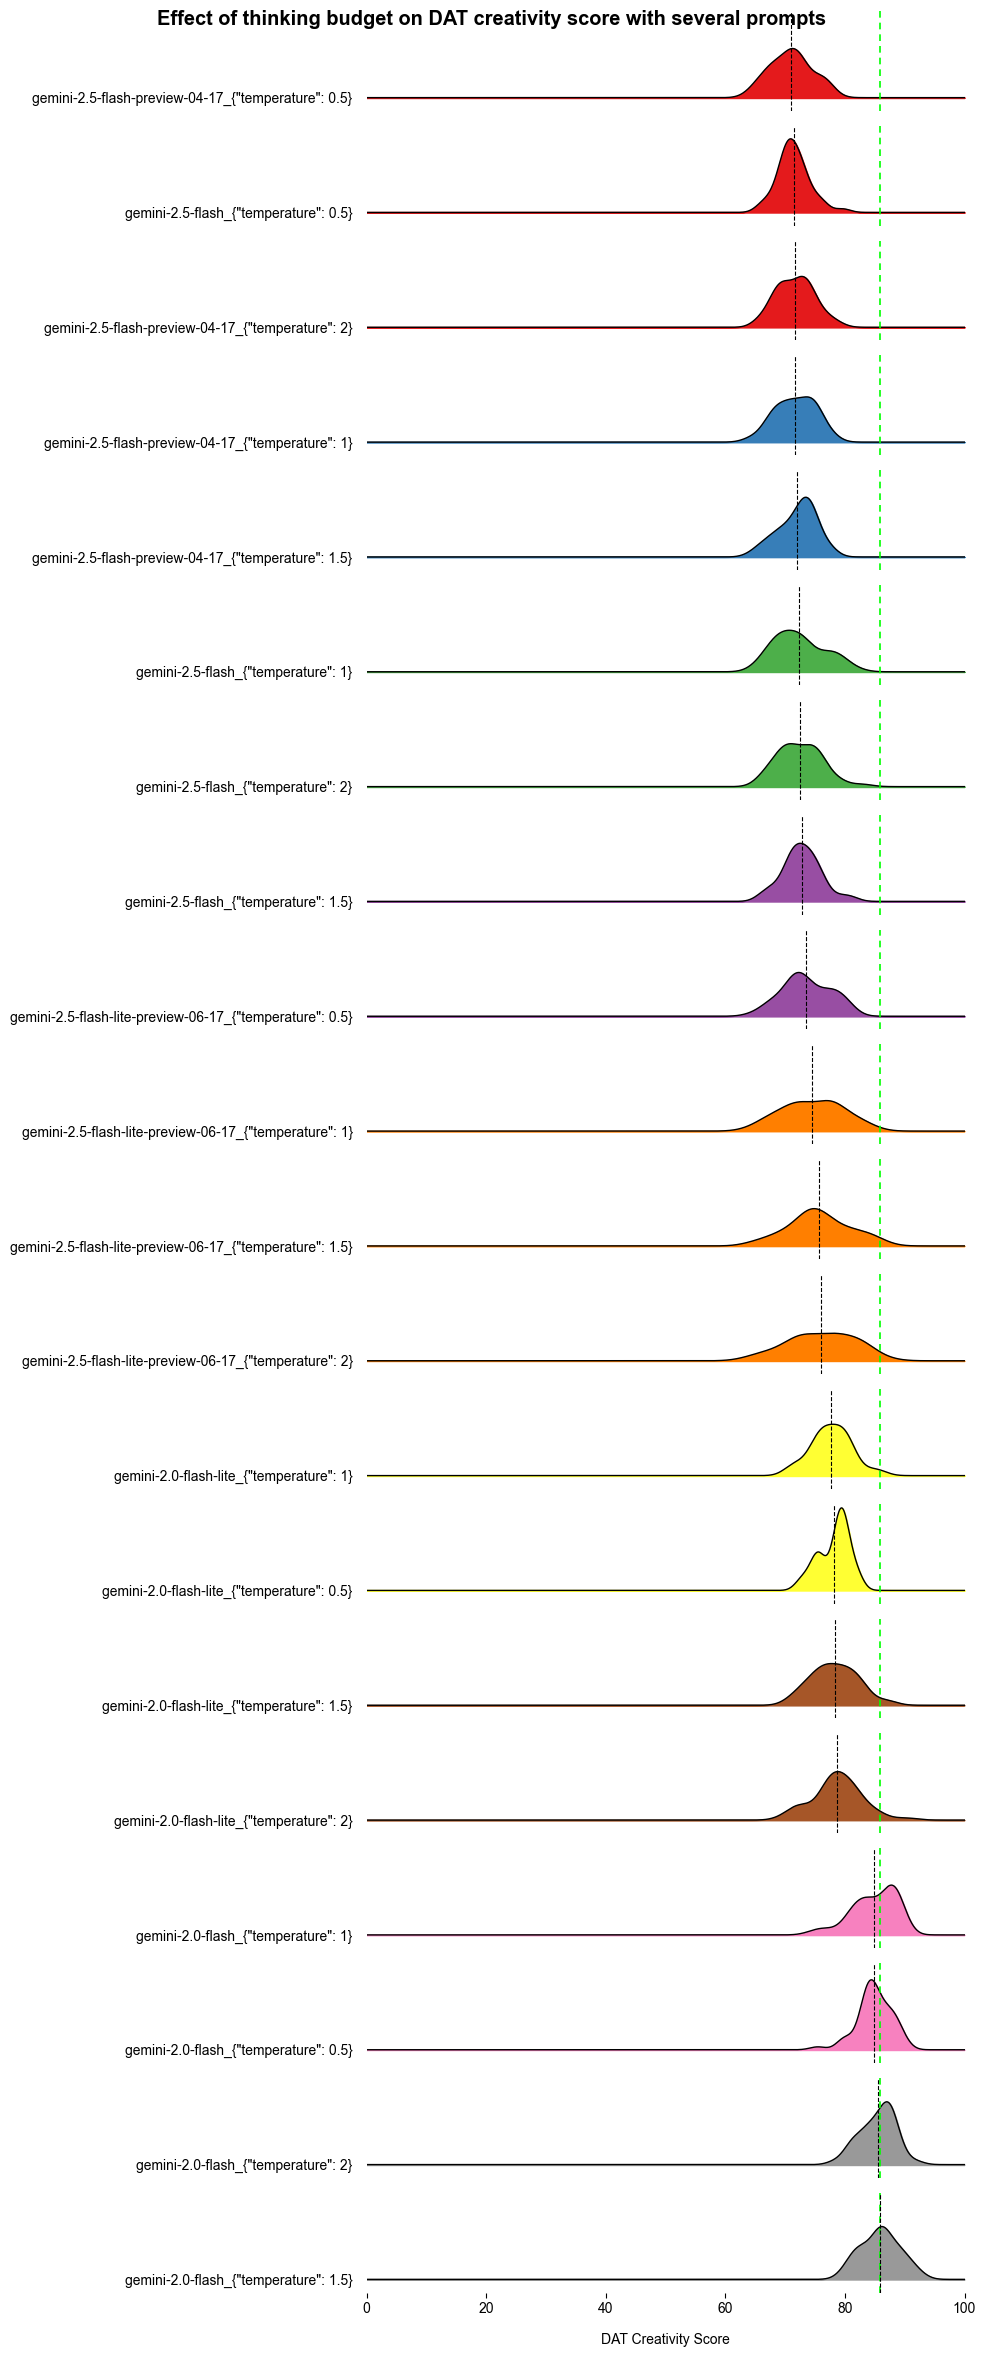

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 1.5}'): 85.89


In [5]:
plot_distribution_results('results/DAT_0618120359_5models_4configs_10words_unnormalized.json',
    dark_mode=False,
    embedding_model=['GloVe'],
    plot_title="Effect of thinking budget on DAT creativity score with several prompts",
    x_axis_title="DAT Creativity Score",
    show_benchmark=True,
    ascending=True,
    x_min=0, 
    x_max=100,
    save_file=False, 
    file_name="thinking_budget_effect_on_creativity.png",
)

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


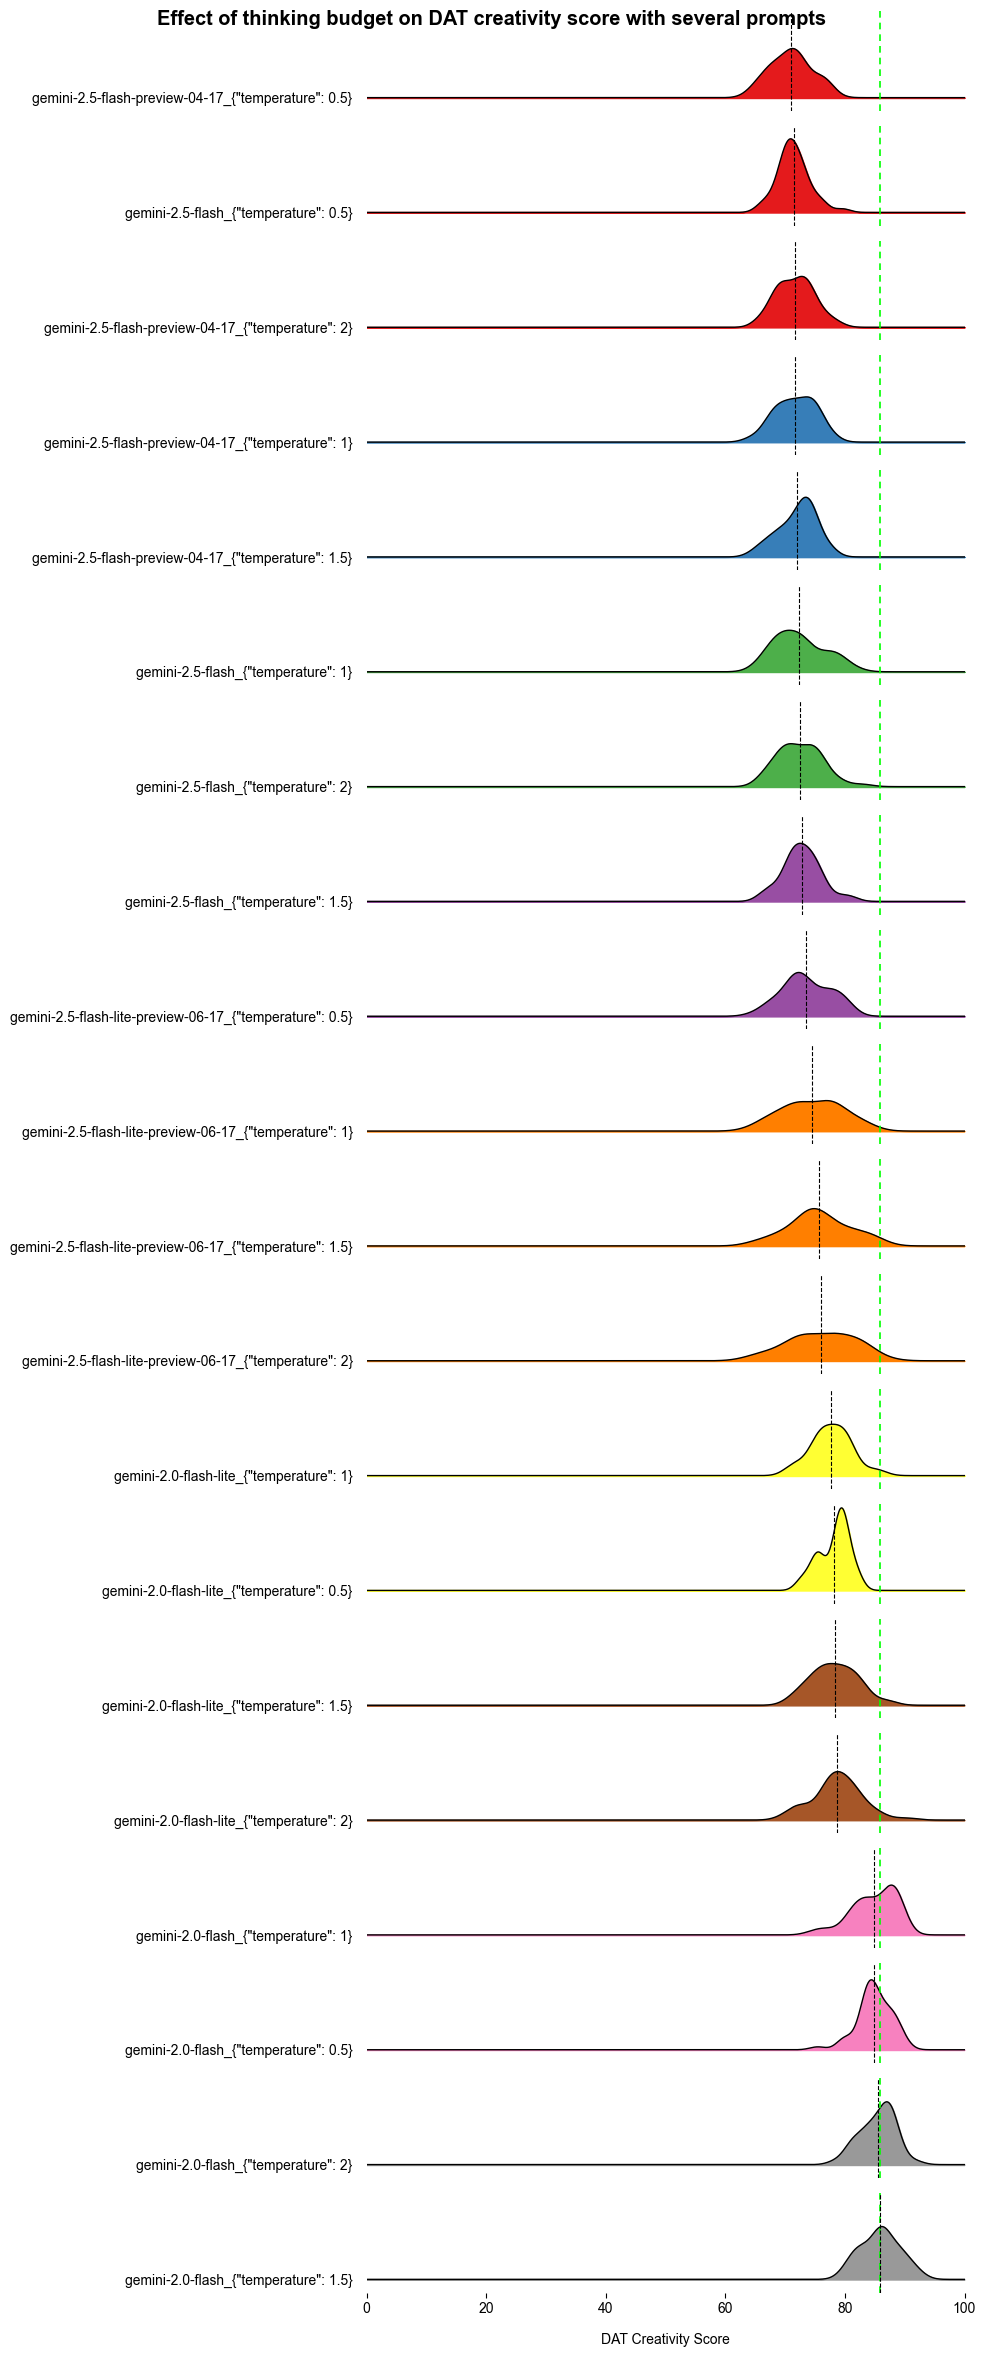

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 1.5}'): 85.89


In [13]:
plot_distribution_results('results/DAT_0618120359_5models_4configs_10words_unnormalized.json',
    dark_mode=False,
    embedding_model=['GloVe'],
    plot_title="Effect of thinking budget on DAT creativity score with several prompts",
    x_axis_title="DAT Creativity Score",
    show_benchmark=True,
    ascending=True,
    x_min=0, 
    x_max=100,
    save_file=False, 
    file_name="thinking_budget_effect_on_creativity.png",
)

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


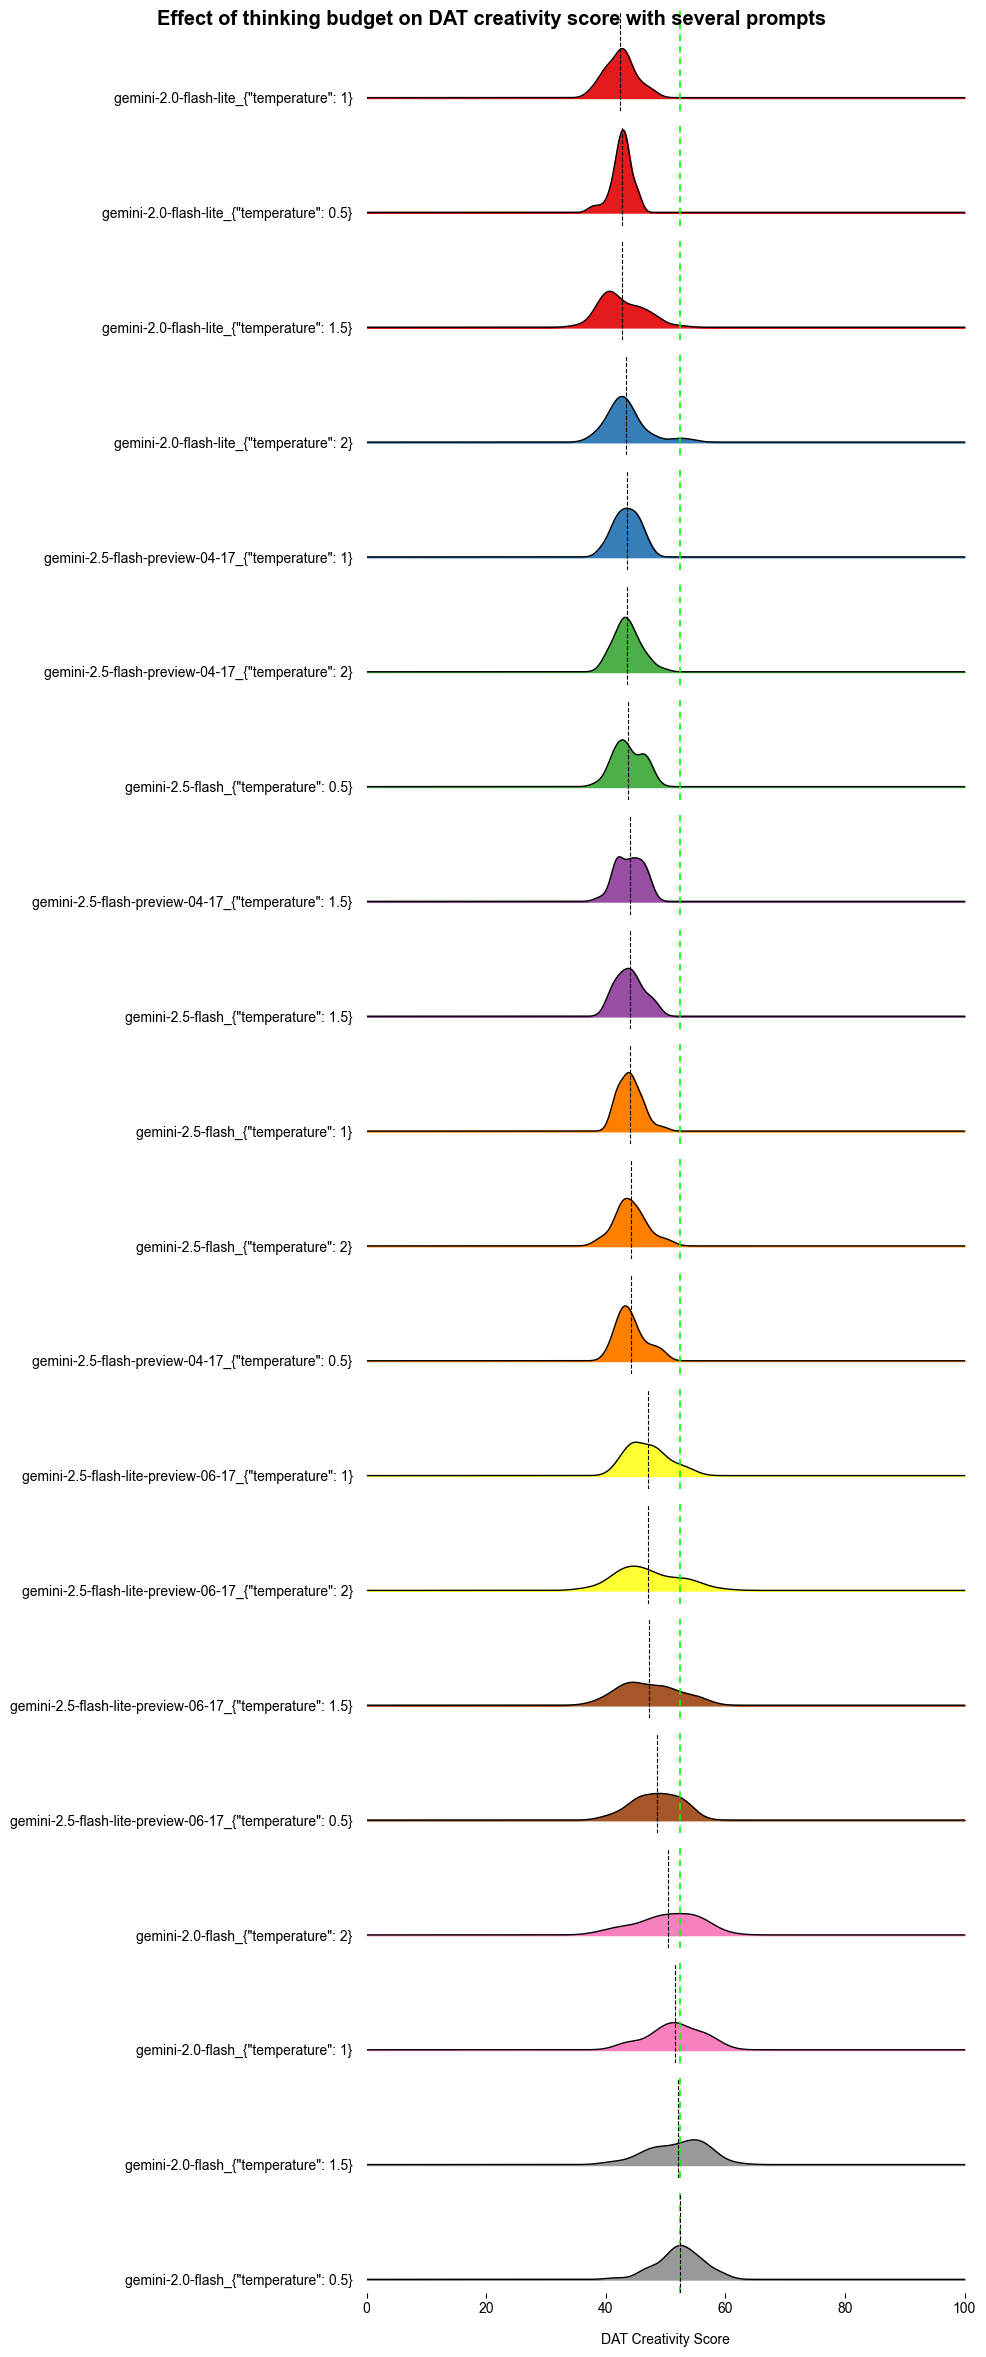

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 0.5}'): 52.39


In [14]:
plot_distribution_results('results/DAT_0618120359_5models_4configs_10words_unnormalized.json',
    dark_mode=False,
    embedding_model=['BERT_WordEmbeddings_L6'],
    plot_title="Effect of thinking budget on DAT creativity score with several prompts",
    x_axis_title="DAT Creativity Score",
    show_benchmark=True,
    ascending=True,
    x_min=0, 
    x_max=100,
    save_file=False, 
    file_name="thinking_budget_effect_on_creativity.png",
)

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


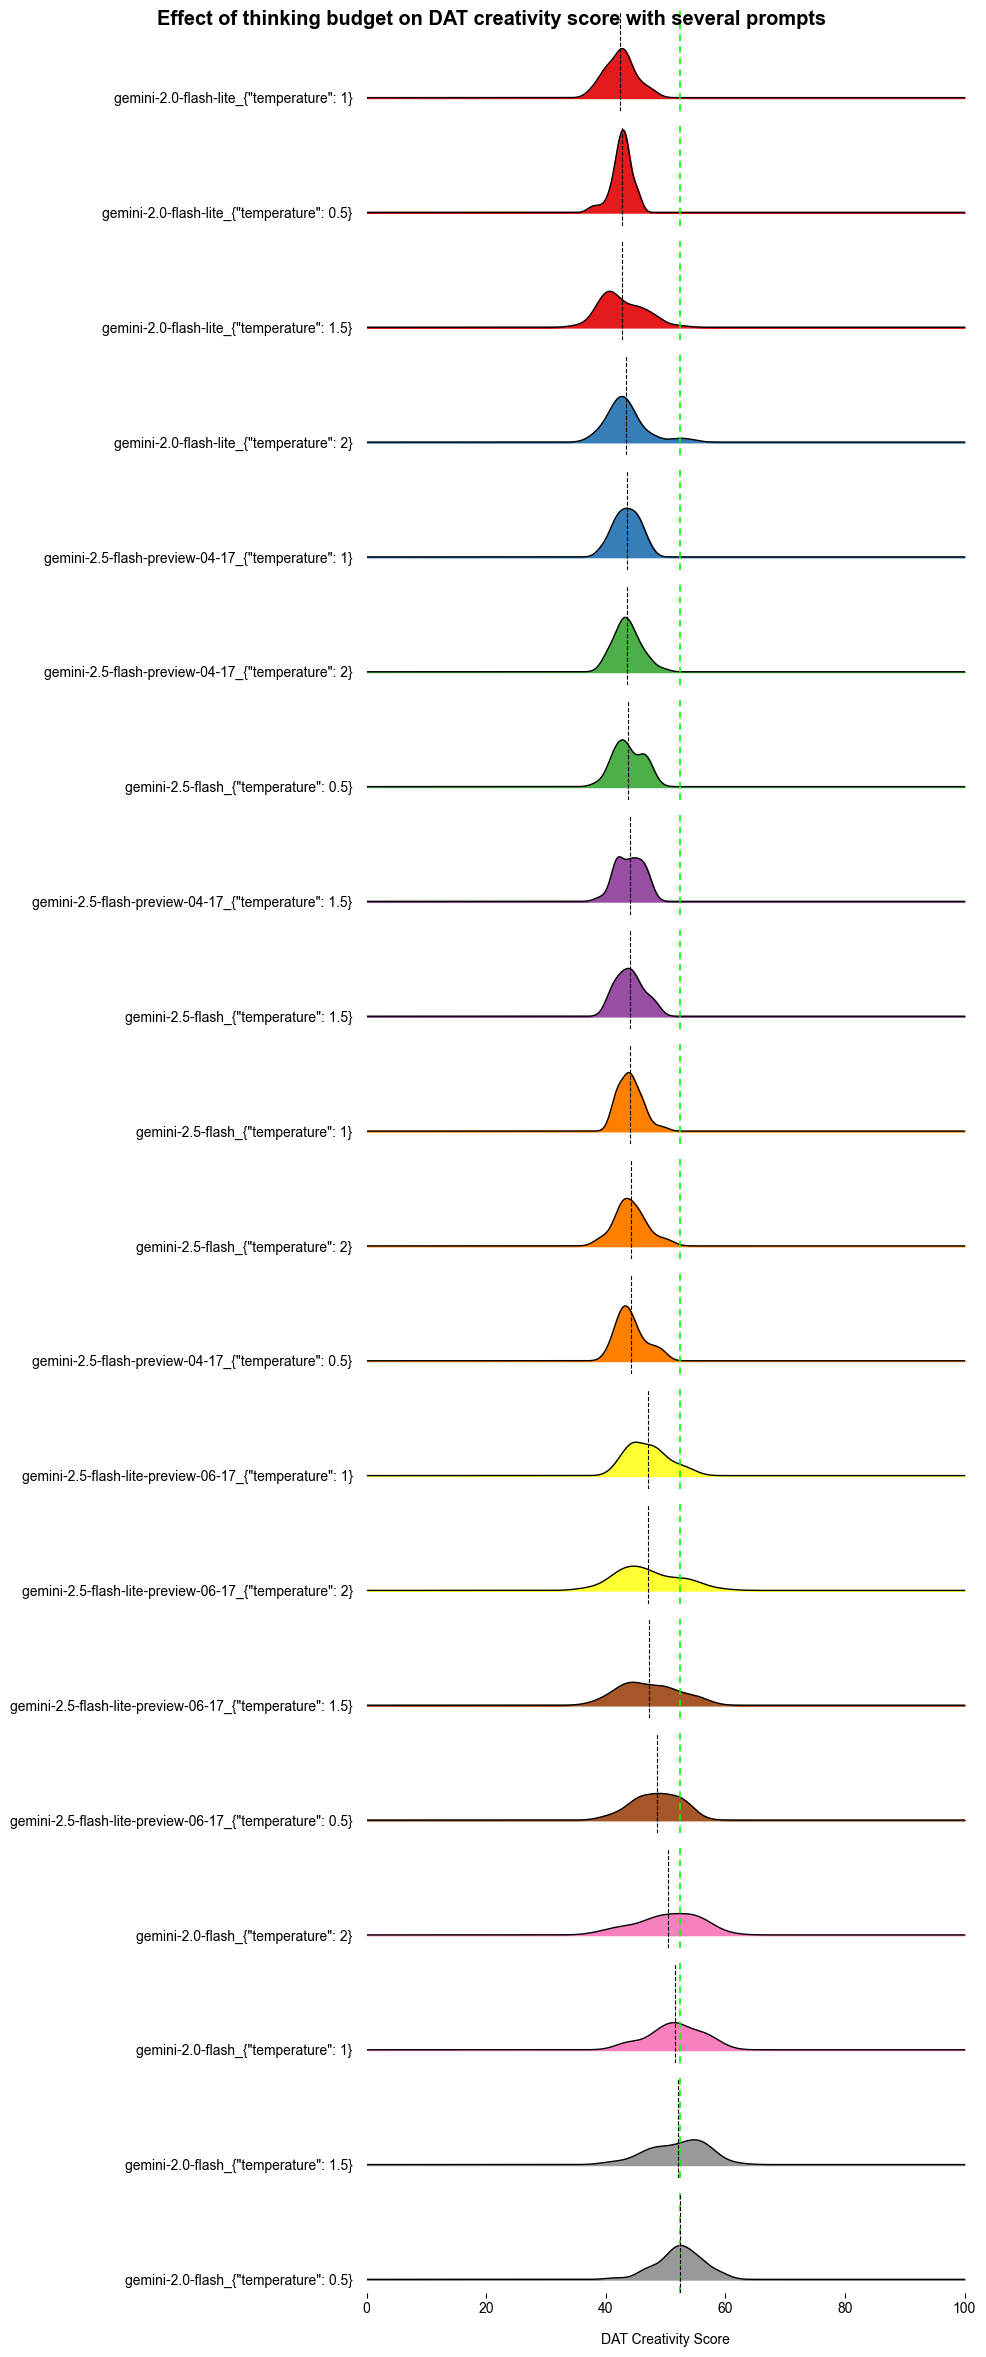

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 0.5}'): 52.39


In [15]:
plot_distribution_results('results/DAT_0618120359_5models_4configs_10words_unnormalized.json',
    dark_mode=False,
    embedding_model=['BERT_WordEmbeddings_L7'],
    plot_title="Effect of thinking budget on DAT creativity score with several prompts",
    x_axis_title="DAT Creativity Score",
    show_benchmark=True,
    ascending=True,
    x_min=0, 
    x_max=100,
    save_file=False, 
    file_name="thinking_budget_effect_on_creativity.png",
)

## Hard Divergent Association Task

### Using random words from the dictionary

In [ ]:
test = HardDivergentAssociationTest(
    models=[
        "gemini-2.0-flash-lite",
        "gemini-2.0-flash",
        "gemini-2.5-flash-lite-preview-06-17"
    ],
    configs=[
        {"temperature": 0.75, "thinking_config": {"thinking_budget": 0}},
        {"temperature": 1, "thinking_config": {"thinking_budget": 0}},
        {"temperature": 1.5, "thinking_config": {"thinking_budget": 0}},
    ],
    repeats=1,
    delay=5,
    embedding_models=[GloVe, BERT_WordEmbeddings_L6, BERT_WordEmbeddings_L7, BERT_Encoder_L7, BERT_Encoder_L6],
    common=False
)

test.calculate_embeddings("responses/HardDAT_0625190013_3models_3configs_25words_clean.json")

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


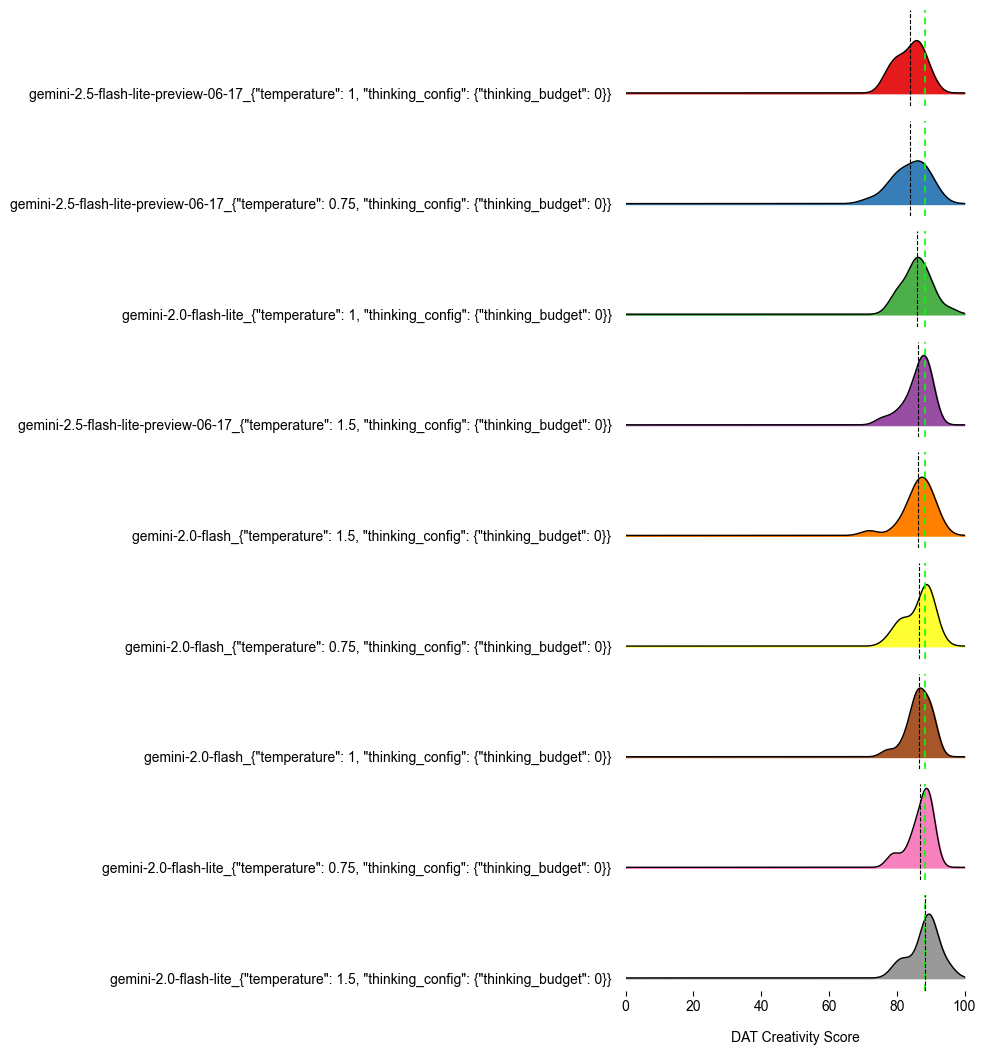

Benchmark (mean of top model 'gemini-2.0-flash-lite_{"temperature": 1.5, "thinking_config": {"thinking_budget": 0}}'): 88.31


In [18]:
# ['GloVe', 'BERT_WordEmbeddings_L6', 'BERT_WordEmbeddings_L7', 'BERT_ENCODER_L6', 'BERT_ENCODER_L7']

plot_distribution_results('results/HardDAT_0625190013_3models_3configs_25words_unnormalized.json',
    dark_mode=False,
    embedding_model=['GloVe'],
    plot_title="",
    x_axis_title="DAT Creativity Score",
    show_benchmark=True,
    ascending=True,
    x_min=0, 
    x_max=100,
    save_file=False, 
    file_name="test.png",
)

Seems like the word embedding model used deeply affects the results. Both BERT_WordEmbeddings_L6 and BERT_WordEmbeddings_L7 seem to show not that much of a difference. However, GloVe seems to indicate a difference.

In [28]:
# Next test

test = HardDivergentAssociationTest(
    models=[
        "gemini-2.5-flash", 
    ],
    configs=[
        {"temperature": 0.5, "thinking_config": {"thinking_budget": 0}},
        {"temperature": 1, "thinking_config": {"thinking_budget": 0}},
        {"temperature": 1.5, "thinking_config": {"thinking_budget": 0}},
        {"temperature": 0.5, "thinking_config": {"thinking_budget": 1000}},
        {"temperature": 1, "thinking_config": {"thinking_budget": 1000}},
        {"temperature": 1.5, "thinking_config": {"thinking_budget": 1000}},
        {"temperature": 0.5, "thinking_config": {"thinking_budget": 2000}},
        {"temperature": 1, "thinking_config": {"thinking_budget": 2000}},
        {"temperature": 1.5, "thinking_config": {"thinking_budget": 2000}},
    ],
    n_words=15,
    given_words=10,
    repeats=1,
    delay=5,
    common=False,
)

test.calculate_embeddings("responses/HardDAT_0626135455_1models_9configs_15words_clean.json")

Found id 0626135455


Initializing model: 2196018it [00:15, 144153.82it/s]


['results/HardDAT_0626135455_1models_9configs_15words_unnormalized.json',
 'results/HardDAT_0626135455_1models_9configs_15words_normalized.json']

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


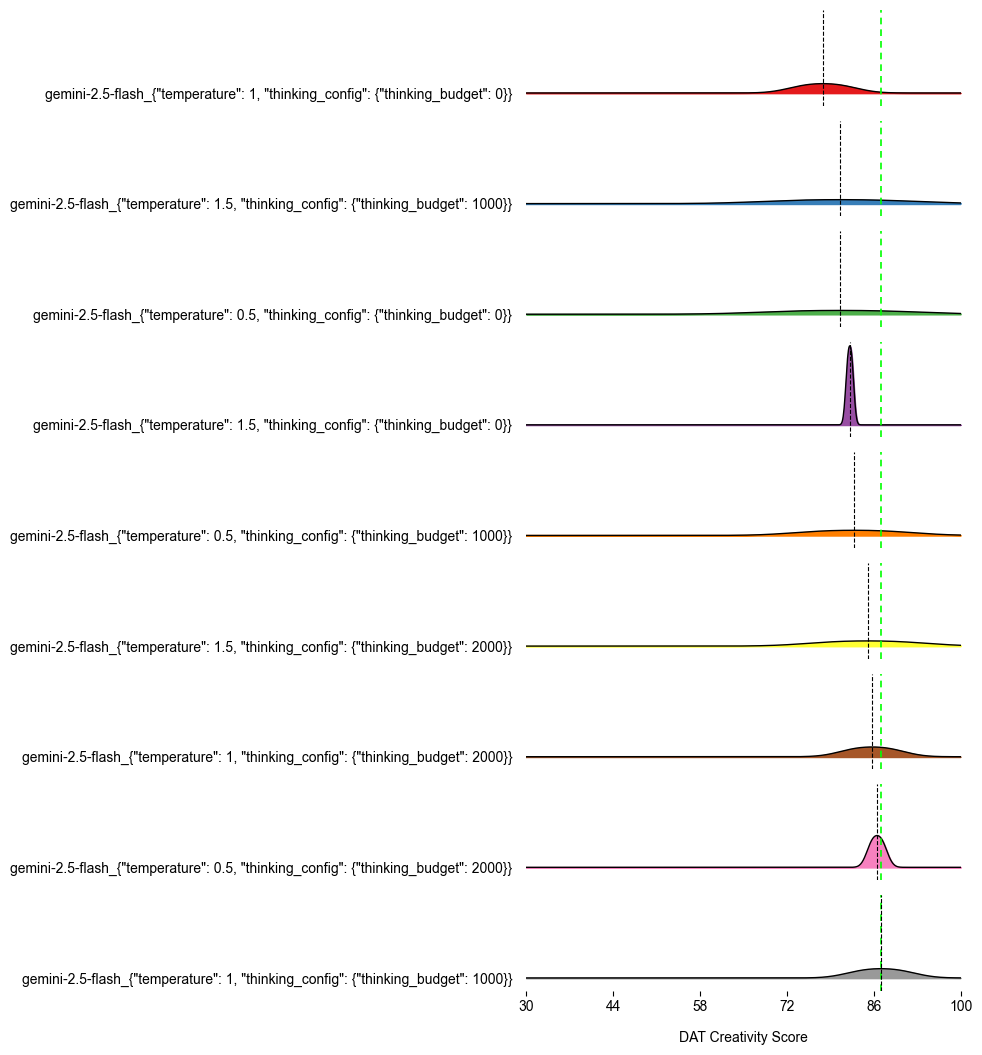

Benchmark (mean of top model 'gemini-2.5-flash_{"temperature": 1, "thinking_config": {"thinking_budget": 1000}}'): 87.16


In [29]:
# ['GloVe', 'BERT_WordEmbeddings_L6', 'BERT_WordEmbeddings_L7']

plot_distribution_results('results/HardDAT_0626135455_1models_9configs_15words_unnormalized.json',
    dark_mode=False,
    embedding_model=['GloVe'],
    plot_title="",
    x_axis_title="DAT Creativity Score",
    show_benchmark=True,
    ascending=True,
    x_min=30, 
    x_max=100,
    save_file=False, 
    file_name="test.png",
)

### Using random words from the top 5k most common words

In [4]:
test = HardDivergentAssociationTest(
    models=[
        "gemini-2.0-flash-lite",
        "gemini-2.0-flash",
        "gemini-2.5-flash-lite-preview-06-17",
        "gemini-2.5-flash",
    ],
    configs=[
        {"temperature": 0.75, "thinking_config": {"thinking_budget": 0}},
        {"temperature": 1, "thinking_config": {"thinking_budget": 0}},
        {"temperature": 1.25, "thinking_config": {"thinking_budget": 0}},
    ],
    repeats=1,
    delay=7,
    n_words=15,
    given_words=10,
    embedding_models=[GloVe, BERT_WordEmbeddings_L6, BERT_WordEmbeddings_L7],
    common=True
)

# test.run()
test.calculate_embeddings("responses/HardDAT_0626155436_4models_3configs_15words_clean.json")

Found id 0626155436


Initializing model: 2196018it [00:15, 137980.39it/s]


['results/HardDAT_0626155436_4models_3configs_15words_unnormalized.json',
 'results/HardDAT_0626155436_4models_3configs_15words_normalized.json']

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


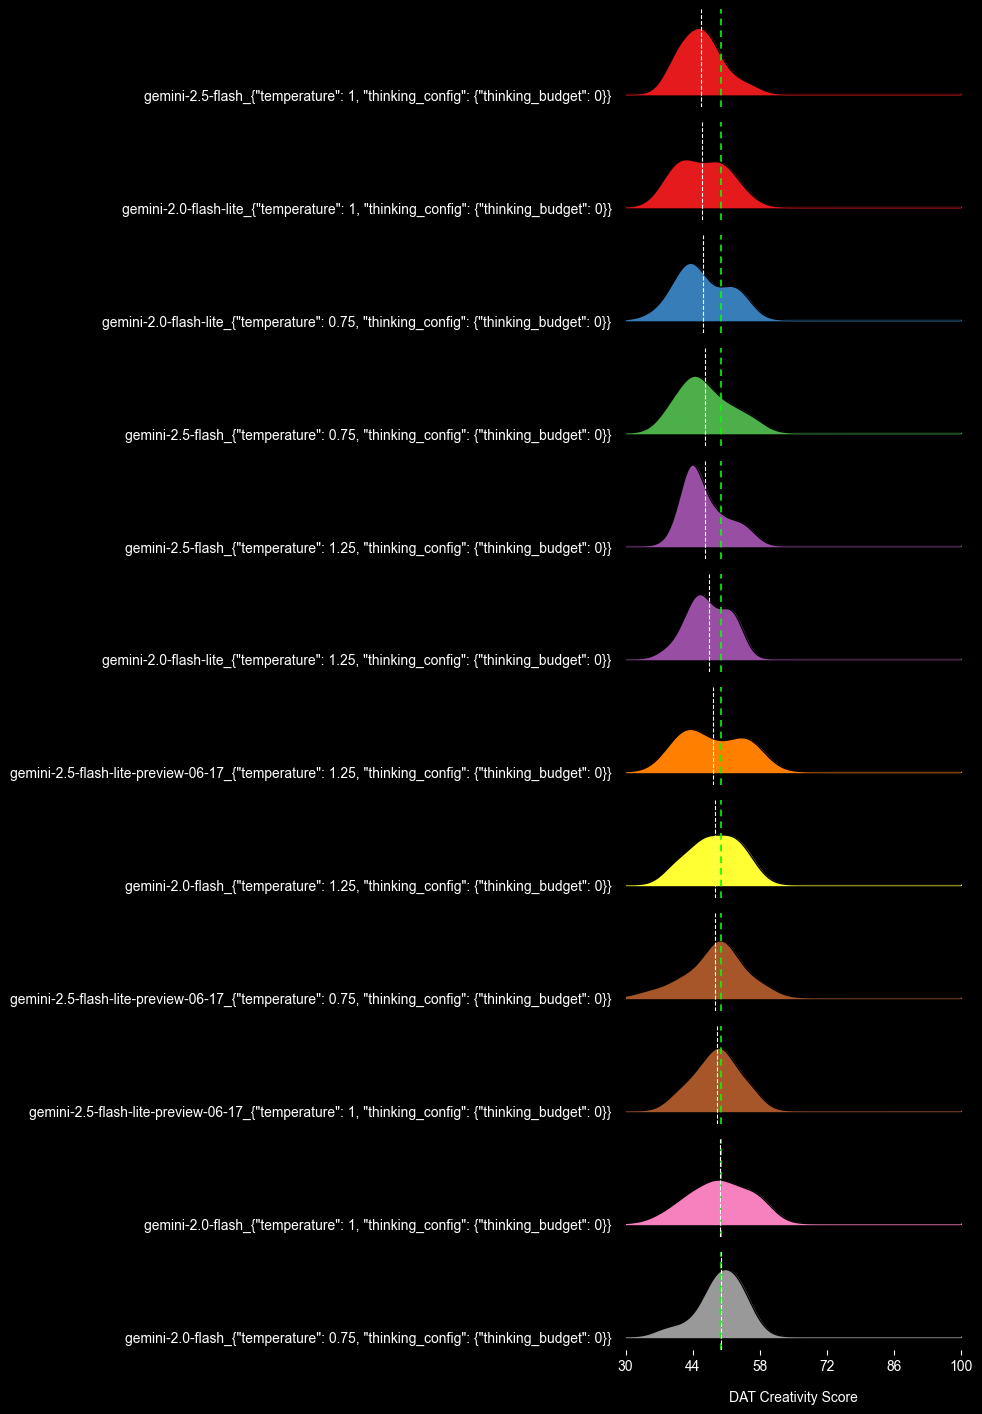

Benchmark (mean of top model 'gemini-2.0-flash_{"temperature": 0.75, "thinking_config": {"thinking_budget": 0}}'): 49.90


In [14]:
# ['GloVe', 'BERT_WordEmbeddings_L6', 'BERT_WordEmbeddings_L7']

plot_distribution_results('results/HardDAT_0626155436_4models_3configs_15words_unnormalized.json',
    dark_mode=True,
    embedding_model=['BERT_WordEmbeddings_L6'],
    plot_title="",
    x_axis_title="DAT Creativity Score",
    show_benchmark=True,
    ascending=True,
    x_min=30, 
    x_max=100,
    save_file=False, 
    file_name="test.png",
)

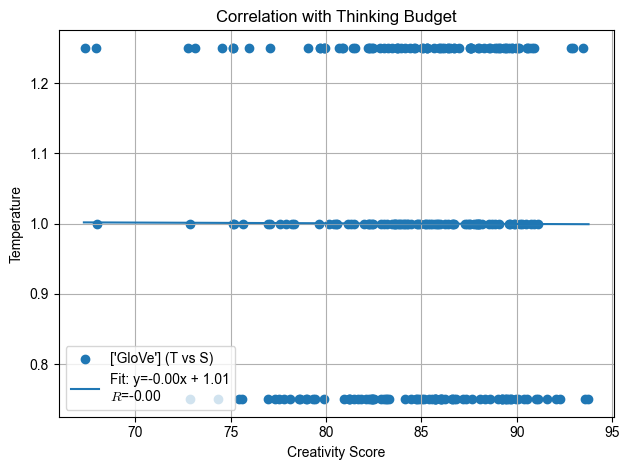

In [13]:
# ['GloVe', 'BERT_WordEmbeddings_L6', 'BERT_WordEmbeddings_L7']

plot_correlation('results/HardDAT_0626155436_4models_3configs_15words_unnormalized.json',
                 key='temperature',
                 embedding_model=["GloVe"],
                 plot_title="Correlation with Thinking Budget",
                 x_axis_title="Creativity Score",
                 y_axis_title="Temperature",
                 save_file=False, 
                 file_name="thinking_budget_effect_on_creativity_correlation.png")